# **서울시 코로나19 현황**



In [1]:
import urllib.request
import json
import pandas as pd
from bs4 import BeautifulSoup

## 데이터 불러오기(판다스로 크롤링)

In [2]:
url="https://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
# 판다스로 크롤링 가능 #단, table 태그를 볼 수 있을 때만 가능
table=pd.read_html(url)

In [4]:
len(table)

5

In [5]:
table[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,67,54,107,102,110,130,166,300,127,148,263,207,103
1,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
2,142,158,233,152,78,152,187,289,157,210,272,167,281


In [6]:
# transpose() 행렬 전환 
# 또는 .T
table[0].transpose()

,0,1,2
종로구,67,마포구,142
중구,54,양천구,158
용산구,107,강서구,233
성동구,102,구로구,152
광진구,110,금천구,78
동대문구,130,영등포구,152
중랑구,166,동작구,187
성북구,300,관악구,289
강북구,127,서초구,157
도봉구,148,강남구,210


In [7]:
#9월 6일 기준 서울시 확진자 수
table[2].T

,0
소계,4362
해외접촉관련,394
노원구 빛가온 교회,43
영등포구 지인 모임,7
강동구 소재 콜센터,18
관악구 가족 모임,5
송파구 소재 병원,8
송파구 소재 물류센터,5
8.15 서울도심 집회,122
극단 산 관련,37


In [8]:
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4362,21267,09.06.,양천구,-,영등포 지인모임,NaN
1,4361,미부여,09.06.,영등포구,-,확인 중,NaN
2,4360,미부여,09.06.,성북구,-,확인 중,NaN
3,4359,미부여,09.06.,도봉구,-,확인 중,NaN
4,4358,미부여,09.06.,강북구,-,확인 중,NaN
...,...,...,...,...,...,...,...
4357,5,9,1.31.,성북구,-,#5 접촉,퇴원
4358,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4359,3,6,1.30.,종로구,-,#3 접촉,퇴원
4360,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [9]:
table[4]

,연번,환자번호,감염경로,확진일,거주지,퇴원현황
0,"4362 <tr> <td class=""tdl"" colspan=""5""> <p>확...",21267,영등포 지인모임,09/06,양천구,NaN
1,"4361 <tr> <td class=""tdl"" colspan=""5""> <p>확...",미부여,확인 중,09/06,영등포구,NaN
2,"4360 <tr> <td class=""tdl"" colspan=""5""> <p>확...",미부여,확인 중,09/06,성북구,NaN
3,"4359 <tr> <td class=""tdl"" colspan=""5""> <p>확...",미부여,확인 중,09/06,도봉구,NaN
4,"4358 <tr> <td class=""tdl"" colspan=""5""> <p>확...",미부여,확인 중,09/06,강북구,NaN
...,...,...,...,...,...,...
4357,"5 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",9,#5 접촉,1/31,성북구,퇴원
4358,"4 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",7,해외 접촉(중국 우한시),1/30,마포구,퇴원
4359,"3 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",6,#3 접촉,1/30,종로구,퇴원
4360,"2 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",5,해외 접촉(중국 우한시),1/30,중랑구,퇴원


In [10]:
df=table[3]
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4362,21267,09.06.,양천구,-,영등포 지인모임,NaN
1,4361,미부여,09.06.,영등포구,-,확인 중,NaN
2,4360,미부여,09.06.,성북구,-,확인 중,NaN
3,4359,미부여,09.06.,도봉구,-,확인 중,NaN
4,4358,미부여,09.06.,강북구,-,확인 중,NaN


In [11]:
# 확진일을 기준으로 파일 저장

last_day=df.loc[0,'확진일']
last_day

'09.06.'

In [12]:
#확장자와 구분이 쉽게 '.'을 _로 변경
last_day=last_day.replace(".","_")
last_day

'09_06_'

In [13]:
#파일명 만들어 주기
file_name=f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_09_06_.csv'

In [14]:
#csv 파일 저장
#index=False 인덱스는 저장하지 않는다.
# unnamed = df의 인덱스 번호로 중복되기 때문
df.to_csv(file_name, index=False)

In [15]:
#파일 저장 확인
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4362,21267,09.06.,양천구,-,영등포 지인모임,NaN
1,4361,미부여,09.06.,영등포구,-,확인 중,NaN
2,4360,미부여,09.06.,성북구,-,확인 중,NaN
3,4359,미부여,09.06.,도봉구,-,확인 중,NaN
4,4358,미부여,09.06.,강북구,-,확인 중,NaN
...,...,...,...,...,...,...,...
4357,5,9,1.31.,성북구,-,#5 접촉,퇴원
4358,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4359,3,6,1.30.,종로구,-,#3 접촉,퇴원
4360,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


## 시각화

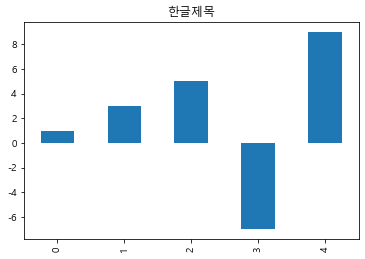

In [19]:
# 한글 폰트 설정
# matplotlib.pyplot
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
#음수값 
plt.rc("axes",unicode_minus=False)

pd.Series([1,3,5,-7,9]).plot.bar(title='한글제목')

## 확진일

In [20]:
# 확진일 빈도수 확인
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.27.    146
8.15.    146
8.22.    140
        ... 
4.20.      1
4.24.      1
5.01.      1
3.3.       1
2.7.       1
Name: 확진일, Length: 201, dtype: int64

In [22]:
# '확진일'컬럼 데이터가 날짜 형태가 아닌 문자형태
df["확진일"].head(1)

0    09.06.
Name: 확진일, dtype: object

In [23]:
#데이터 타입 변경: 날짜형태로
#판다스의 to_datetime을 사용
#연도가 없기 때문에 연도(2020) 추가, "-"로 날짜 연결

df["확진일자"]=pd.to_datetime("2020-"+df["확진일"].str.replace(".","-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,09.06.,2020-09-06
1,09.06.,2020-09-06
2,09.06.,2020-09-06
3,09.06.,2020-09-06
4,09.06.,2020-09-06


In [25]:
#월만 추출

df["월"]=df["확진일자"].dt.month
df[["확진일","확진일자", "월"]].tail()

,확진일,확진일자,월
4357,1.31.,2020-01-31,1
4358,1.30.,2020-01-30,1
4359,1.30.,2020-01-30,1
4360,1.30.,2020-01-30,1
4361,1.24.,2020-01-24,1


In [26]:
# 해당 연도의 몇번째 '주'
df["주"]=df["확진일자"].dt.week
df[["확진일", "확진일자","월","주"]].head()

,확진일,확진일자,월,주
0,09.06.,2020-09-06,9,36
1,09.06.,2020-09-06,9,36
2,09.06.,2020-09-06,9,36
3,09.06.,2020-09-06,9,36
4,09.06.,2020-09-06,9,36


## 선그래프 그리기

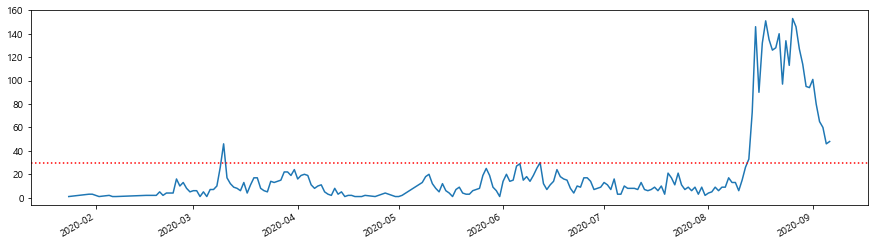

In [30]:
# 확진일자로 선그래프 그리기

df["확진일자"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(30, color="red", linestyle=":")

## 선 그래프에 값 표시하기

In [38]:
#일자별 확진자수 선그래프로 그리기
#연도는 모두 2020년, 월일만 표기되도록 슬라이싱해서 "월일"컬럼

df["월일"]=df["확진일자"].astype(str).map(lambda x: x[5:])
#df["월일"]=df["확진일자"].astype(str).map(lambda x: x[-5:])

day_count=df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-02    80
09-03    65
09-04    60
09-05    46
09-06    48
Name: 월일, Length: 198, dtype: int64

In [46]:
day_count.iloc[27]

26

In [40]:
for i in range(len(day_count)):
    case_count=day_count.iloc[i]
    if case_count>20:
        print(i,case_count)

27 26
28 46
46 22
47 22
49 24
95 25
104 27
105 29
110 25
111 30
116 24
149 21
152 21
172 26
173 33
174 73
175 146
176 90
177 132
178 151
179 135
180 126
181 128
182 140
183 97
184 134
185 113
186 153
187 146
188 127
189 114
190 95
191 94
192 101
193 80
194 65
195 60
196 46
197 48


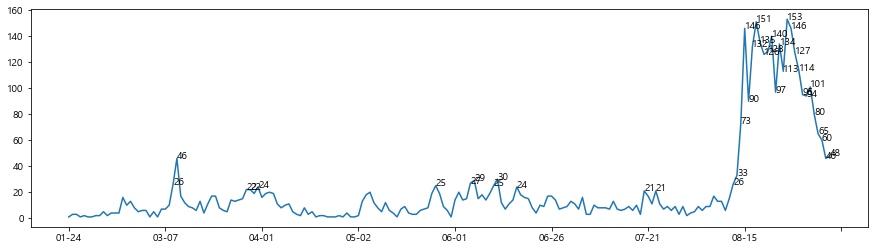

In [45]:
g= day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count >20:
        g.text(x=i, y=case_count, s=case_count)
        #s는 case_count값을 보여줌

## 확진자가 가장 많이 나온 날

In [47]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-02    80
09-03    65
09-04    60
09-05    46
09-06    48
Name: 월일, Length: 198, dtype: int64

In [48]:
#요약 : describe()
day_count.describe()

count    198.000000
mean      22.030303
std       34.713170
min        1.000000
25%        5.000000
50%        9.500000
75%       18.000000
max      153.000000
Name: 월일, dtype: float64

In [49]:
# 확진자가 가장 많았던 날
day_count[day_count==day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [50]:
# 확진자가 가장 많았던 날의 발생이력

df[df["월일"]=="08-26"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
976,3386,18601,8.26.,노원구,-,8.15도심집회,NaN,2020-08-26,8,35,08-26
977,3385,18575,8.26.,성북구,-,확인 중,NaN,2020-08-26,8,35,08-26
978,3384,18573,8.26.,기타,-,확인 중,NaN,2020-08-26,8,35,08-26
979,3383,18572,8.26.,노원구,-,확인 중,NaN,2020-08-26,8,35,08-26
980,3382,18568,8.26.,노원구,-,8.15도심집회,NaN,2020-08-26,8,35,08-26


## 막대그래프 그리기

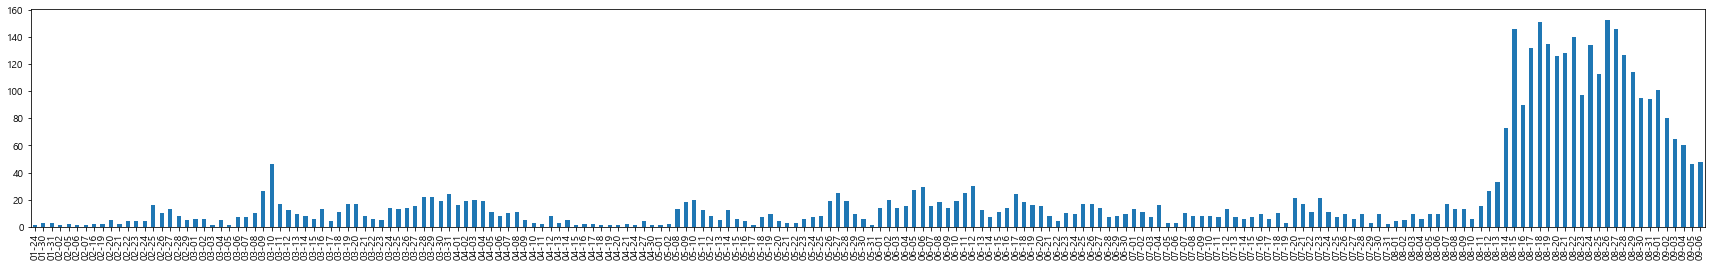

In [51]:
# 위에서 선그래프로 그린 것을 막대그래프로 그리기

day_count.plot.bar(figsize=(30,4))

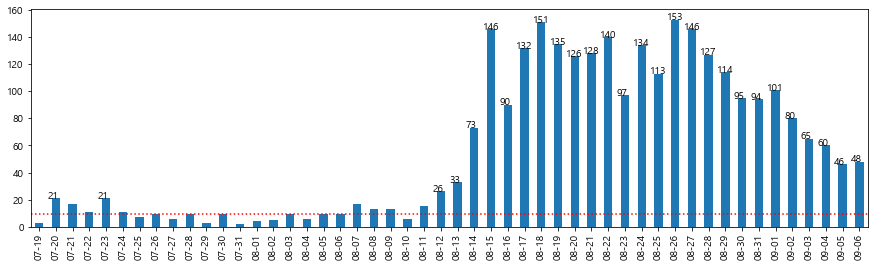

In [55]:
# 최근 데이터만 슬라이싱으로 나누어 그리기

g=day_count[-50:].plot.bar(figsize=(15,4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 20:
        g.text(x=i-0.5, y=case_count, s=case_count)

## 월별 확진자 수

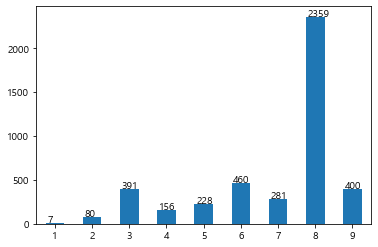

In [59]:
month_case=df["월"].value_counts().sort_index()
g=month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])